In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
playerdata_1718season = '.\playerstatsbygame_20172018_regularseason.csv'
playerseasondata = '.\Seasons_Stats.csv'
salarydata = '.\Salarydata.xlsx'
playersalary = '.\playersalaries.csv'

In [3]:
playerstats_1718 = pd.read_csv(playerdata_1718season)
playerseasondata = pd.read_csv(playerseasondata)
salary_team = pd.read_excel(salarydata, sheet_name = 'Team Salary Cap')
salary_players = pd.read_csv(playersalary)


In [4]:
salary_team.head()

,Rk,Team,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,1,Golden State Warriors,137494845,128341465,85953438,43006362,45780966.0,NaN
1,2,Cleveland Cavaliers,137362708,137976709,103941273,3872215,NaN,NaN
2,3,Oklahoma City Thunder,134294056,137538745,88281978,72478103,43848000.0,46662000.0
3,4,Miami Heat,131222624,145760423,134274753,40763735,11600000.0,NaN
4,5,Washington Wizards,124179842,124797665,107593646,98065014,43848000.0,46872000.0


In [5]:
playerdata_17 = playerseasondata.loc[playerseasondata.loc[:, 'Year'] == 2017, :]

In [6]:
salary_players.head()

,Rk,Player,Tm,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,Signed Using,Guaranteed
0,1,Stephen Curry,GSW,"$34,682,550","$37,457,154","$40,231,758","$43,006,362","$45,780,966",NaN,Bird Rights,"$201,158,790"
1,2,LeBron James,CLE,"$33,285,709","$35,607,968",NaN,NaN,NaN,NaN,Early Bird,"$33,285,709"
2,3,Paul Millsap,DEN,"$31,269,231","$29,730,769","$30,500,000",NaN,NaN,NaN,Cap space,"$61,000,000"
3,4,Gordon Hayward,BOS,"$29,727,900","$31,214,295","$32,700,690","$34,187,085",NaN,NaN,Cap space,"$93,642,885"
4,5,Blake Griffin,DET,"$29,512,900","$31,873,932","$34,234,964","$36,595,996","$38,957,028",NaN,Bird Rights,"$132,217,792"


In [7]:
salary_2017 = salary_players.loc[:, ['Player', 'Tm', '2017-18']]
salary_2017.columns = ['Player', 'Team', 'Salary']

In [8]:
playerdata_17 = playerdata_17.merge(salary_2017, how='outer', on='Player')

Get RPM data from ESPN for 16-17 & 17-18

In [39]:
#Get all the plus/minus data for 2017-2018, iterate through each page of stats
plusminus_topplayers = pd.read_html('http://www.espn.com/nba/statistics/rpm/_/sort/WINS')
rpm_1718 = plusminus_topplayers[0]

for i in range(2,15):
    rpm_url = 'http://www.espn.com/nba/statistics/rpm/_/page/' + str(i) + '/sort/WINS'
    plusminuspage = pd.read_html(rpm_url)
    rpm_1718 = pd.concat([rpm_1718, plusminuspage[0]])

#Get all the plus/minus data for 2016-2017, iterate through each page of stats
plusminus_topplayers = pd.read_html('http://www.espn.com/nba/statistics/rpm/_/year/2017/sort/WINS')
rpm_1617 = plusminus_topplayers[0]

for i in range(2,13):
    rpm_url = 'http://www.espn.com/nba/statistics/rpm/_/year/2017/page/' + str(i) + '/sort/WINS'
    plusminuspage = pd.read_html(rpm_url)
    rpm_1617 = pd.concat([rpm_1617, plusminuspage[0]])
rpm_1617.reset_index()
rpm_1718.reset_index()

,index,0,1,2,3,4,5,6,7,8
0,0,RK,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
1,1,1,"James Harden, PG",HOU,72,35.4,6.80,-0.13,6.67,15.97
2,2,2,"LeBron James, SF",CLE,82,36.9,5.66,-0.67,4.99,15.91
3,3,3,"Anthony Davis, PF",NO,75,36.4,1.78,3.80,5.58,15.61
4,4,4,"Russell Westbrook, PG",OKC,80,36.4,3.95,0.97,4.92,15.28
5,5,5,"Victor Oladipo, SG",IND,75,34.0,2.76,3.25,6.01,14.93
6,6,6,"Robert Covington, SF",PHI,80,31.6,1.26,4.30,5.56,14.50
7,7,7,"Nikola Jokic, C",DEN,75,32.5,4.06,1.89,5.95,14.00
8,8,8,"Damian Lillard, PG",POR,73,36.6,5.34,-0.38,4.96,13.77
9,9,9,"Kyle Lowry, PG",TOR,78,32.2,4.23,1.02,5.25,13.71


In [45]:
#Clean it up - rename columns, get rid of header rows from going through each URL page, check for nulls
rpm_1617.columns = ['RK', 'NAME','TEAM','GP','MPG','ORPM','DRPM','RPM','WINS']
rpm_1718.columns = ['RK', 'NAME','TEAM','GP','MPG','ORPM','DRPM','RPM','WINS']

rpm_1718 = rpm_1718[rpm_1718.RK != 'RK']
rpm_1617 = rpm_1617[rpm_1617.RK != 'RK']

rpm_1718.isnull().sum()
rpm_1617.isnull().sum()

RK      0
NAME    0
TEAM    0
GP      0
MPG     0
ORPM    0
DRPM    0
RPM     0
WINS    0
dtype: int64

In [59]:
playerdata_17.drop(['Unnamed: 0','Team'], axis=1, inplace=True)


Team Salary Analysis

In [35]:
salary_team.describe()

,Rk,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
count,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,1.600000e+01,7.000000e+00
mean,15.500000,1.119855e+08,9.985377e+07,7.450282e+07,3.750874e+07,2.389582e+07,3.000047e+07
std,8.803408,1.393424e+07,2.529411e+07,2.935572e+07,2.368616e+07,1.785791e+07,2.041646e+07
min,1.000000,8.590449e+07,3.914336e+07,3.120676e+07,1.500000e+06,9.285700e+04,9.285700e+04
25%,8.250000,1.005091e+08,8.141839e+07,5.207217e+07,1.927986e+07,9.411107e+06,1.808721e+07
50%,15.500000,1.156188e+08,1.016160e+08,7.783326e+07,4.078287e+07,2.375107e+07,3.333000e+07
75%,22.750000,1.196270e+08,1.175480e+08,8.851451e+07,5.115624e+07,4.384800e+07,4.676700e+07
max,30.000000,1.374948e+08,1.457604e+08,1.342748e+08,9.806501e+07,4.578097e+07,4.687200e+07


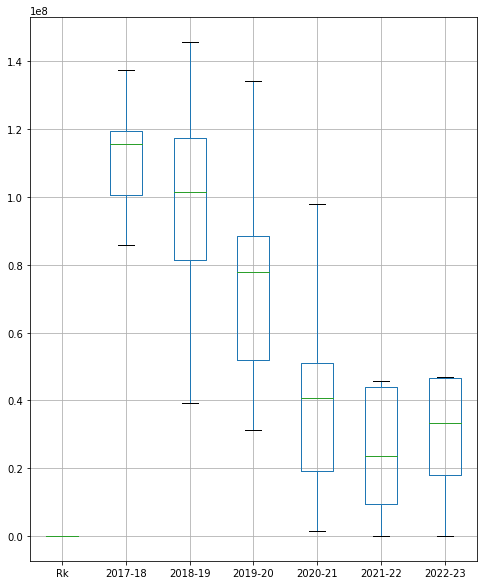

In [40]:
salary_team.boxplot(figsize = (8,10));

In [43]:
playerdata_17.dtypes

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
blanl     float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
blank2    float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Team       object
Salary     object
dtype: object

In [68]:
playerdata_17.isnull().sum()
#Lots of nulls for salary; replacing with 0. also need to change the salary column to float

playerdata_17.loc[playerdata_17.loc[:, 'Salary'].isnull(), :]

playerdata_17['Salary'] = playerdata_17['Salary'].replace('[\$,]', '', regex=True).astype(float)
playerdata_17.loc[:, 'Salary'].fillna(value=0, inplace=True)


In [70]:
playerdata_17.isnull().sum()
playerdata_17.dtypes
#all column types make sense now

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
blanl     float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
blank2    float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Salary    float64
dtype: object

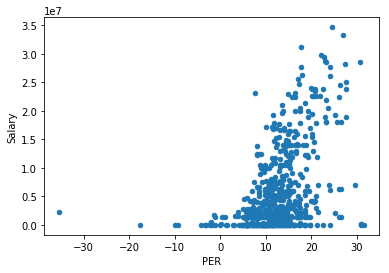

In [76]:
fig, ax = plt.subplots()
playerdata_17.plot(kind='scatter', x='PER', y='Salary', ax=ax);

In [ ]:
sns.pairplot(playerdata_17)

C:\Users\testr\Anaconda\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\testr\Anaconda\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.